## Crypto Token Correlation Heatmap

In [1]:
from dotenv import load_dotenv  # ✅ Import this first
import os
import requests
import pandas as pd

load_dotenv()  # ✅ Now you can call it



True

In [12]:

api_key = os.getenv("GECKO_API")  # ✅ Use your actual variable name from .env
coin_id = "bitcoin"
vs_currency = "usd"
days = "30"

url = f"https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart"

params = {
    "vs_currency": vs_currency,
    "days": days
}
headers = {
    "accept": "application/json",
    "x-cg-pro-api-key": api_key
}
response = requests.get(url, headers=headers, params=params)
print(response.text)

{"prices":[[1752231757026,118076.13750043296],[1752235459175,117859.49747777793],[1752239030597,117848.04110858658],[1752242603858,117875.83779176614],[1752246242421,117817.4794051443],[1752249817250,117027.85521407622],[1752253414425,117413.00004600344],[1752256898748,117617.10575760741],[1752260638085,117713.07691377234],[1752264229235,118058.02209116159],[1752267831972,117798.94309681411],[1752271415124,117587.32907369744],[1752275010786,117613.8185655966],[1752278636469,117571.02510036016],[1752282235563,117387.89394499933],[1752285831923,117687.69438680657],[1752289430097,117635.359545087],[1752293040121,117725.05729082492],[1752296649636,117685.87924248539],[1752300232205,117723.43596264633],[1752303838398,117947.15754070041],[1752307442173,117752.86079185014],[1752311006298,117881.05769359317],[1752314646475,118143.01873929753],[1752318216450,118110.58284934341],[1752321659711,117835.46100136574],[1752325434563,117515.67059179093],[1752329015449,117476.30745219445],[175233264319

In [13]:
data = response.json()

df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)
print(df.head(20))

                                 price
timestamp                             
2025-07-11 11:02:37.026  118076.137500
2025-07-11 12:04:19.175  117859.497478
2025-07-11 13:03:50.597  117848.041109
2025-07-11 14:03:23.858  117875.837792
2025-07-11 15:04:02.421  117817.479405
2025-07-11 16:03:37.250  117027.855214
2025-07-11 17:03:34.425  117413.000046
2025-07-11 18:01:38.748  117617.105758
2025-07-11 19:03:58.085  117713.076914
2025-07-11 20:03:49.235  118058.022091
2025-07-11 21:03:51.972  117798.943097
2025-07-11 22:03:35.124  117587.329074
2025-07-11 23:03:30.786  117613.818566
2025-07-12 00:03:56.469  117571.025100
2025-07-12 01:03:55.563  117387.893945
2025-07-12 02:03:51.923  117687.694387
2025-07-12 03:03:50.097  117635.359545
2025-07-12 04:04:00.121  117725.057291
2025-07-12 05:04:09.636  117685.879242
2025-07-12 06:03:52.205  117723.435963


In [15]:

from datetime import datetime

def fetch_hourly_price_data(coin_ids, vs_currency='usd', days='30'):
    base_url ="https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    price_dfs = []

    for coin_id in coin_ids:
        # url = f"{base_url}/{coin_id}/market_chart"
        url = base_url.format(coin_id=coin_id)

        params = {
            'vs_currency': vs_currency,
            'days': days,
           # 'interval': 'hourly'
        }

        headers = {
            "accept": "application/json",
            "x-cg-pro-api-key": os.getenv("GECKO_API")
        }

        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()
        data = response.json()

        df = pd.DataFrame(data['prices'], columns=['timestamp', coin_id])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        df = df.resample('1h').last()  # You can change to '1D' for daily

        price_dfs.append(df)

    result_df = pd.concat(price_dfs, axis=1)
    return result_df


In [14]:

tokens = ['bitcoin', 'ethereum', 'solana']
df_prices = fetch_hourly_price_data(tokens, days='30')

import joblib

save_dir = "C:\\Users\\g\\OneDrive\\Documents\\Crypto Correlation heatmap\\Project\\Database"
os.makedirs(save_dir, exist_ok=True)
joblib.dump(df_prices, os.path.join(save_dir, "crypto_prices.pkl"))

print(df_prices.head(20))

Status for bitcoin: 200
Status for ethereum: 200
Status for solana: 200
                           bitcoin     ethereum      solana
timestamp                                                  
2025-07-11 12:00:00  117859.497478  2985.144399  163.926691
2025-07-11 13:00:00  117848.041109  2985.362356  164.393806
2025-07-11 14:00:00  117875.837792  2998.491476  166.003515
2025-07-11 15:00:00  117817.479405  2994.298045  166.740288
2025-07-11 16:00:00  117027.855214  2954.673792  162.328123
2025-07-11 17:00:00  117413.000046  2968.619819  162.731858
2025-07-11 18:00:00  117617.105758  2992.624183  164.025868
2025-07-11 19:00:00  117713.076914  2994.946707  164.175869
2025-07-11 20:00:00  118058.022091  3002.772130  164.319229
2025-07-11 21:00:00  117798.943097  2982.624063  163.274036
2025-07-11 22:00:00  117587.329074  2964.518292  162.277648
2025-07-11 23:00:00  117613.818566  2949.458455  161.670392
2025-07-12 00:00:00  117571.025100  2958.851445  162.753194
2025-07-12 01:00:00  117387.

In [7]:
import os
from dotenv import load_dotenv

load_dotenv()  # loads .env into environment variables


True

In [17]:
import os
import requests
import pandas as pd
import joblib

def fetch_hourly_price_data(coin_ids, vs_currency='usd', days='30'):
    price_dfs = []
    api_key = os.getenv("GECKO_API").strip()

    for coin_id in coin_ids:
        url = f"https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
        params = {
            'vs_currency': vs_currency,
            'days': days
            # Do NOT include 'interval'
        }
        headers = {
            "accept": "application/json",
            "x-cg-pro-api-key": api_key
        }

        print(f"Fetching data for {coin_id} from: {url}")
        response = requests.get(url, params=params, headers=headers)
        print(f"Status for {coin_id}: {response.status_code}")
        if response.status_code != 200:
             print(f"Response content: {response.text}")

        response.raise_for_status()

        data = response.json()
        df = pd.DataFrame(data['prices'], columns=['timestamp', coin_id])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        df = df.resample('1h').last()  # You can still resample to hourly yourself

        price_dfs.append(df)

    result_df = pd.concat(price_dfs, axis=1)
    return result_df


# Usage
tokens = ['bitcoin', 'ethereum', 'solana', 'ripple']
df_prices = fetch_hourly_price_data(tokens, days='30')


save_dir = "C:\\Users\\g\\OneDrive\\Documents\\Crypto Correlation heatmap\\Project\\Database"
os.makedirs(save_dir, exist_ok=True)
joblib.dump(df_prices, os.path.join(save_dir, "crypto_prices.pkl"))

print(df_prices.head(5000))


Fetching data for bitcoin from: https://pro-api.coingecko.com/api/v3/coins/bitcoin/market_chart
Status for bitcoin: 200
Fetching data for ethereum from: https://pro-api.coingecko.com/api/v3/coins/ethereum/market_chart
Status for ethereum: 200
Fetching data for solana from: https://pro-api.coingecko.com/api/v3/coins/solana/market_chart
Status for solana: 200
Fetching data for ripple from: https://pro-api.coingecko.com/api/v3/coins/ripple/market_chart
Status for ripple: 200
                           bitcoin     ethereum      solana    ripple
timestamp                                                            
2025-07-11 12:00:00  117859.497478  2985.144399  163.926691  2.628710
2025-07-11 13:00:00  117848.041109  2985.362356  164.393806  2.677536
2025-07-11 14:00:00  117875.837792  2998.491476  166.003515  2.781365
2025-07-11 15:00:00  117817.479405  2994.298045  166.740288  2.820046
2025-07-11 16:00:00  117027.855214  2954.673792  162.328123  2.787528
...                            ..

In [9]:
def fetch_hourly_price_data(coin_ids, vs_currency='usd', days='30'):
    base_url = "https://pro-api.coingecko.com/api/v3/coins"
    price_dfs = []

    for coin_id in coin_ids:
        url = f"{base_url}/{coin_id}/market_chart"

        params = {
            'vs_currency': vs_currency,
            'days': days,
            #
        }

        headers = {
            "accept": "application/json",
            "x-cg-pro-api-key": os.getenv("GECKO_API")
        }

        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()
        data = response.json()

        df = pd.DataFrame(data['prices'], columns=['timestamp', coin_id])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        df = df.resample('1h').last()

        price_dfs.append(df)

    result_df = pd.concat(price_dfs, axis=1)
    return result_df


In [10]:
# Usage
tokens = ['bitcoin', 'ethereum', 'solana']
df_prices = fetch_hourly_price_data(tokens, days='30')

# Show the first 20 rows
print(df_prices.head(20))


                           bitcoin     ethereum      solana
timestamp                                                  
2025-07-11 12:00:00  117859.497478  2985.144399  163.926691
2025-07-11 13:00:00  117848.041109  2985.362356  164.393806
2025-07-11 14:00:00  117875.837792  2998.491476  166.003515
2025-07-11 15:00:00  117817.479405  2994.298045  166.740288
2025-07-11 16:00:00  117027.855214  2954.673792  162.328123
2025-07-11 17:00:00  117413.000046  2968.619819  162.731858
2025-07-11 18:00:00  117617.105758  2992.624183  164.025868
2025-07-11 19:00:00  117713.076914  2994.946707  164.175869
2025-07-11 20:00:00  118058.022091  3002.772130  164.319229
2025-07-11 21:00:00  117798.943097  2982.624063  163.274036
2025-07-11 22:00:00  117587.329074  2964.518292  162.277648
2025-07-11 23:00:00  117613.818566  2949.458455  161.670392
2025-07-12 00:00:00  117571.025100  2958.851445  162.753194
2025-07-12 01:00:00  117387.893945  2946.596836  162.869062
2025-07-12 02:00:00  117687.694387  2961

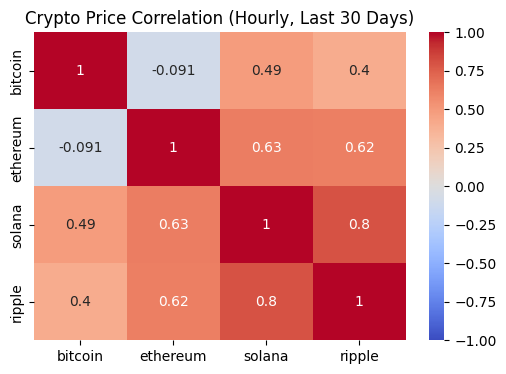

In [22]:
# Drop rows with any NaN values
# df_prices_clean = df_prices.dropna()

# Optional: Verify no NaNs remain
# print(df_prices_clean.isna().sum())

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_prices.corr()

figura = plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Crypto Price Correlation (Hourly, Last 30 Days)")
plt.show()


### Price Volatity

In [24]:
import numpy as np

# Compute hourly returns
returns = df_prices.pct_change().dropna()

# Compute volatility (std dev of returns)
volatility = returns.std() * np.sqrt(24*30)  # Annualize to 30 days of hourly data

# Show results
print("Price Volatility (30-day, annualized):")
print(volatility.sort_values(ascending=False))


Price Volatility (30-day, annualized):
ripple      0.236487
solana      0.191834
ethereum    0.169255
bitcoin     0.079678
dtype: float64


In [25]:
print(returns.head())

                      bitcoin  ethereum    solana    ripple
timestamp                                                  
2025-07-11 13:00:00 -0.000097  0.000073  0.002850  0.018574
2025-07-11 14:00:00  0.000236  0.004398  0.009792  0.038778
2025-07-11 15:00:00 -0.000495 -0.001399  0.004438  0.013907
2025-07-11 16:00:00 -0.006702 -0.013233 -0.026461 -0.011531
2025-07-11 17:00:00  0.003291  0.004720  0.002487 -0.003874


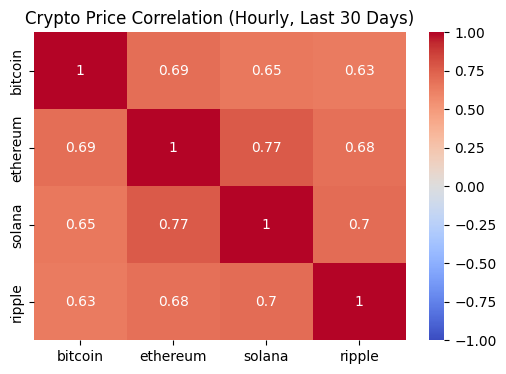

In [26]:
corr = returns.corr()

figura = plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Crypto Price Correlation (Hourly, Last 30 Days)")
plt.show()


Fetching data for ethereum from: https://pro-api.coingecko.com/api/v3/coins/ethereum/market_chart
Status for ethereum: 200
Fetching data for ripple from: https://pro-api.coingecko.com/api/v3/coins/ripple/market_chart
Status for ripple: 200

--- 30-Day Annualized Volatility ---
ripple      0.235623
ethereum    0.169276
dtype: float64

--- Correlation Matrix ---
          ethereum    ripple
ethereum  1.000000  0.682209
ripple    0.682209  1.000000


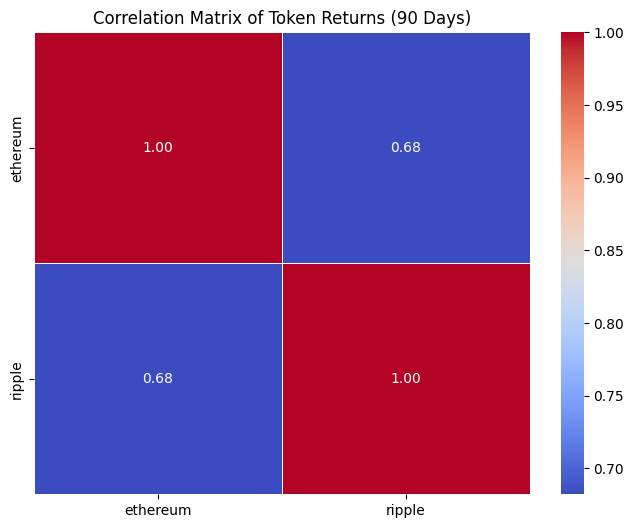

In [35]:
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

def fetch_hourly_price_data(coin_ids, vs_currency='usd', days='90'):
    base_url = "https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    headers = {
        "accept": "application/json",
        "x-cg-pro-api-key": os.getenv("GECKO_API")
    }

    all_data = pd.DataFrame()

    for coin_id in coin_ids:
        url = base_url.format(coin_id=coin_id)
        params = {
            "vs_currency": vs_currency,
            "days": days
        }
        print(f"Fetching data for {coin_id} from: {url}")
        response = requests.get(url, params=params, headers=headers)
        print(f"Status for {coin_id}: {response.status_code}")

        if response.status_code != 200:
            print(f"Failed to fetch {coin_id}: {response.text}")
            continue

        data = response.json()
        df = pd.DataFrame(data['prices'], columns=['timestamp', coin_id])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)

        df = df.resample('1h').last()  # Hourly resample

        if all_data.empty:
            all_data = df
        else:
            all_data = all_data.join(df, how='outer')

    return all_data

# --- Dynamic token input ---
tokens_input = input("Enter token IDs separated by commas (e.g., bitcoin,ethereum,solana): ")
tokens = [t.strip() for t in tokens_input.split(",") if t.strip()]

# Fetch data
df_prices = fetch_hourly_price_data(tokens, days='30')

# Drop missing values
df_prices_clean = df_prices.dropna()

# --- Volatility ---
returns = df_prices_clean.pct_change().dropna()
volatility = returns.std() * np.sqrt(24*30)

# --- Correlation ---
correlation_matrix = returns.corr()

# Print results
print("\n--- 30-Day Annualized Volatility ---")
print(volatility.sort_values(ascending=False))

print("\n--- Correlation Matrix ---")
print(correlation_matrix)

# --- Plot heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Token Returns (90 Days)")
plt.show()


In [33]:
import os
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

def load_tokens_from_config(config_path="config.json"):
    if not os.path.exists(config_path):
        raise FileNotFoundError(f"Config file '{config_path}' not found.")
    with open(config_path, "r") as f:
        config = json.load(f)
    return config.get("tokens", [])

def fetch_hourly_price_data(coin_ids, vs_currency='usd', days='30'):
    base_url = "https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    headers = {
        "accept": "application/json",
        "x-cg-pro-api-key": os.getenv("GECKO_API")
    }

    all_data = pd.DataFrame()

    for coin_id in coin_ids:
        url = base_url.format(coin_id=coin_id)
        params = {
            "vs_currency": vs_currency,
            "days": days
        }
        print(f"Fetching data for {coin_id} from: {url}")
        response = requests.get(url, params=params, headers=headers)
        print(f"Status for {coin_id}: {response.status_code}")

        if response.status_code != 200:
            print(f"Failed to fetch {coin_id}: {response.text}")
            continue

        data = response.json()
        df = pd.DataFrame(data['prices'], columns=['timestamp', coin_id])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        df = df.resample('1h').last()

        if all_data.empty:
            all_data = df
        else:
            all_data = all_data.join(df, how='outer')

    return all_data

# --- Load tokens from config file ---
tokens = load_tokens_from_config()

# Fetch data
df_prices = fetch_hourly_price_data(tokens, days='30')

# Clean missing values
df_prices_clean = df_prices.dropna()

# --- Volatility ---
returns = df_prices_clean.pct_change().dropna()
volatility = returns.std() * np.sqrt(24*30)

# --- Correlation ---
correlation_matrix = returns.corr()

# Print results
print("\n--- 30-Day Annualized Volatility ---")
print(volatility.sort_values(ascending=False))

print("\n--- Correlation Matrix ---")
print(correlation_matrix)

# --- Plot heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Token Returns (30 Days)")
plt.show()


Fetching data for bitcoin from: https://pro-api.coingecko.com/api/v3/coins/bitcoin/market_chart
Status for bitcoin: 200
Fetching data for ethereum from: https://pro-api.coingecko.com/api/v3/coins/ethereum/market_chart
Status for ethereum: 200
Fetching data for solana from: https://pro-api.coingecko.com/api/v3/coins/solana/market_chart
Status for solana: 200
Fetching data for ripple from: https://pro-api.coingecko.com/api/v3/coins/ripple/market_chart
Status for ripple: 200
Fetching data for cardano from: https://pro-api.coingecko.com/api/v3/coins/cardano/market_chart
Status for cardano: 200
Fetching data for polkadot from: https://pro-api.coingecko.com/api/v3/coins/polkadot/market_chart
Status for polkadot: 200
Fetching data for chainlink from: https://pro-api.coingecko.com/api/v3/coins/chainlink/market_chart


KeyboardInterrupt: 